# Decisions Trees

Un **arbre de decision (Decision Tree)** est un modèle d'apprentissage utilisé pour prendre des décisions ou faire des prédictions. Il fonctionne en posant une série de questions simples sur les données, et en suivant les branches selon les réponses (oui/non, >/<, ...) jusqu'à arriver à une décision finale.  
Le modèle cherche la meilleure variable pour faire une première séparation puis le meilleur seuil. Finalement, il répète cela sur chaque sous-groupe pour grandir l'arbre.

## Decision tree classification with scikit-learn

In [39]:
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import numpy as np

iris = datasets.load_iris()
X = iris.data
Y = iris.target

La description du dataset indique 3 classes, 50 samples par classe, 150 samples au total et 4 features, vérifions cela.

In [40]:
print(f"Il y a {X.shape[0]} samples et {X.shape[1]} features\n")
print(f"features:\n {iris.feature_names}\n")
print(f"classes:\n {iris.target_names}\n")

unique, counts = np.unique(Y, return_counts=True)
for u, c in zip(unique, counts):
    print(f"{c} données dans la classe {u}")

Il y a 150 samples et 4 features

features:
 ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']

classes:
 ['setosa' 'versicolor' 'virginica']

50 données dans la classe 0
50 données dans la classe 1
50 données dans la classe 2


Les données chargées correspondent bien à la description fournit dans la documentation.

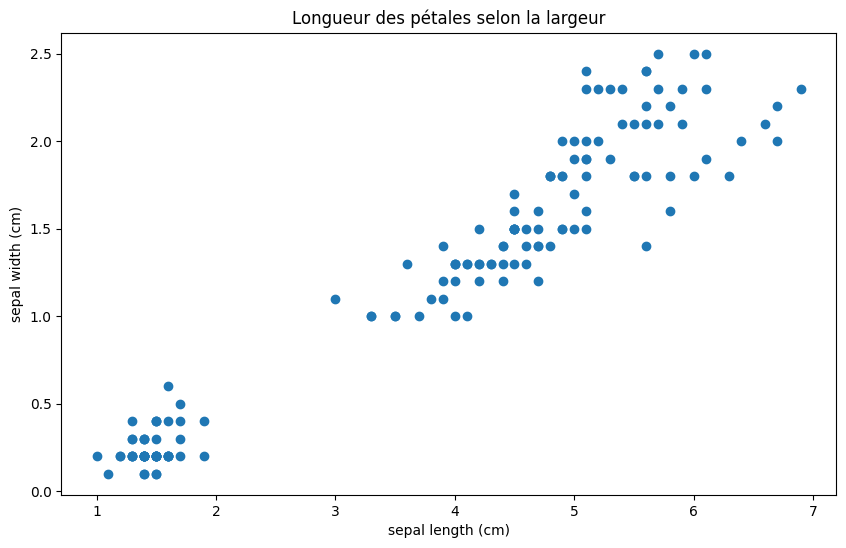

In [41]:
plt.figure(figsize=(10,6))
plt.scatter(X[:,2],X[:,3])
plt.title("Longueur des pétales selon la largeur")
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.show()

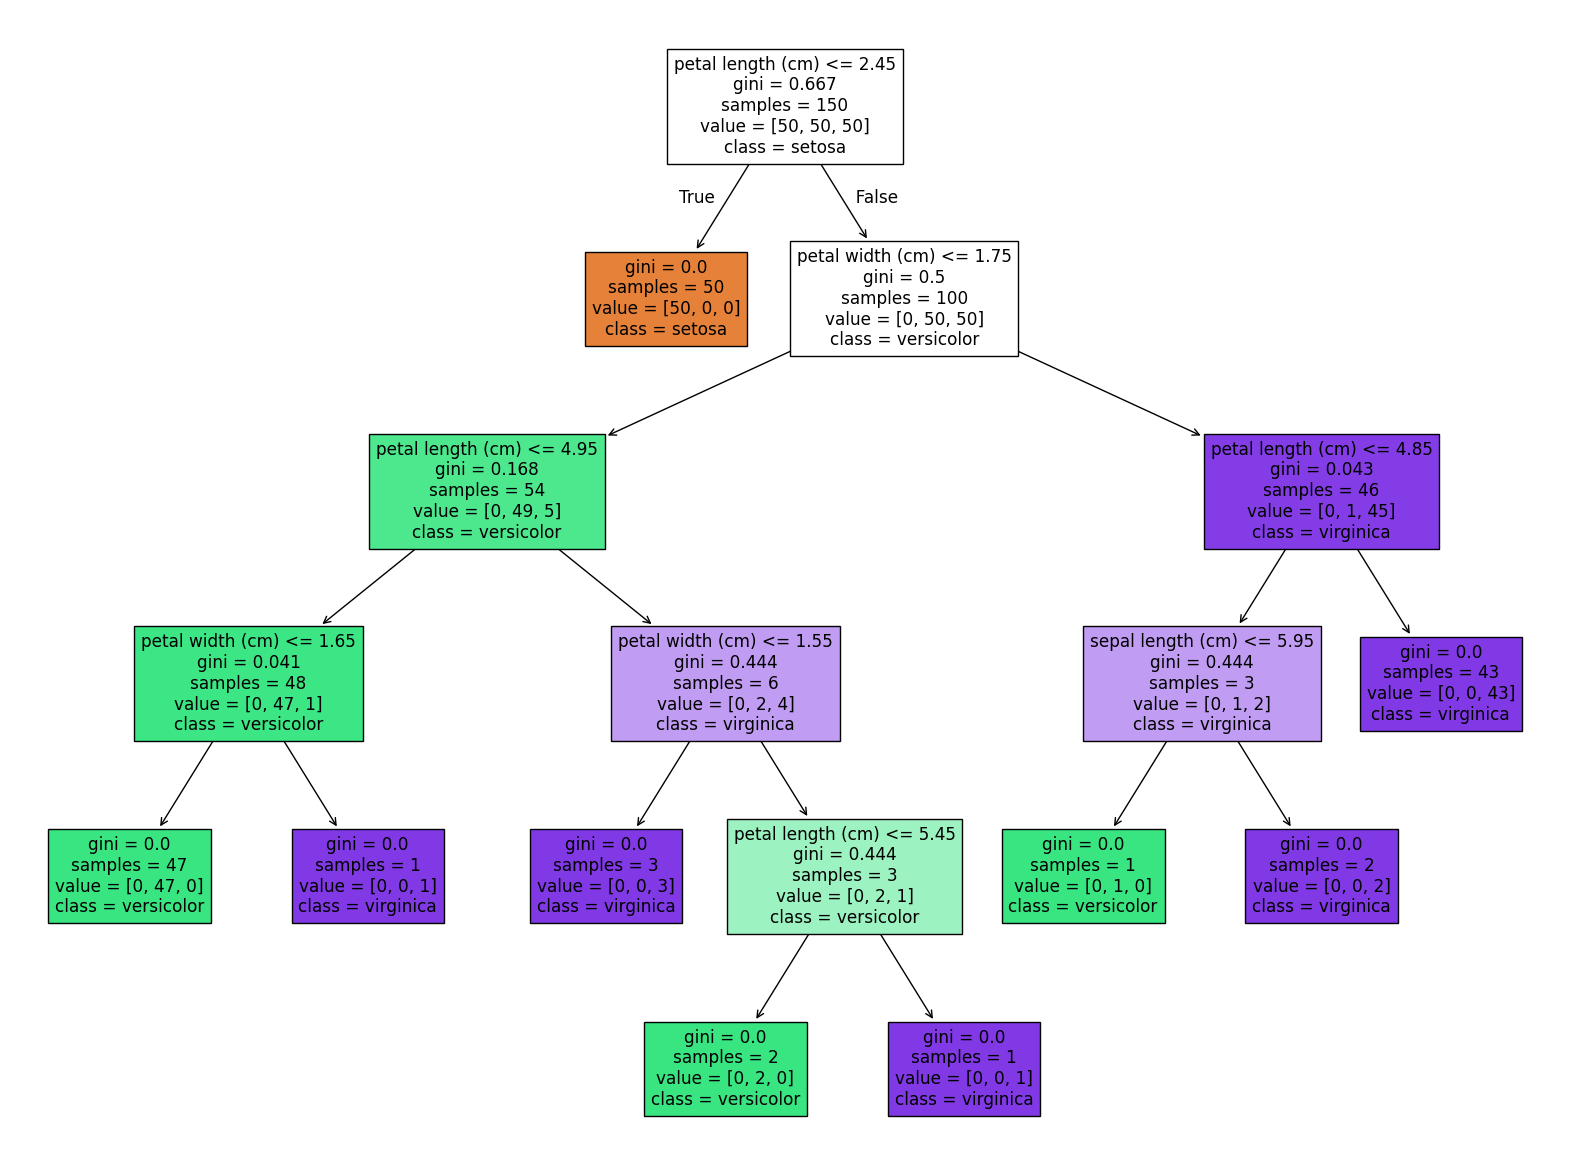

In [42]:
from sklearn.tree import plot_tree

clf = DecisionTreeClassifier(random_state=42)
clf.fit(X,Y)

plt.figure(figsize=(20,15))
plot_tree(clf, filled=True, feature_names=iris.feature_names, 
              class_names=iris.target_names)
plt.show()

**impureté de Gini**: mesure de qualité de séparaition: indique à quel point un noeud contient un mélange de classes.  
- Gini=0: noeud pur => une seule classe.
- GIni élevé => mélange de classes.

Prenons ce noeud par exemple:
- petal length(cm) < 4 
- gini = 0.043 
- samples = 46 
- value = [0,1,45] 
- class = virginica

Cela signifie que toutes les fleurs du noeud ont une longueur de pétal inférieure à 4cm, qu'il y a 46 fleurs dont 0 setosa, 1 versicolor, 45 virginica, et la classe majoritaire est virginica. L'indice de gini est faible, ce qui indique une classe proche d'être pure.

On pourrait croire qu'il faudrait une valeur de gini à 0 pour chaque noeud or cela impliquerait d'avoir un arbre très profond or cela signifierait un modèle plus compliqué, probablbment du surapprentissage => il faut trouver un compromis: trouver un arbre assez pur sans être trop profond.

L’arbre obtenu ici possède une profondeur de 6 et des nœuds parfaitement purs (gini = 0).
Ceci indique que le modèle a continué à se diviser jusqu’à mémoriser les données d’entraînement, ce qui correspond à un phénomène d’overfitting.
Pour éviter cela, il est nécessaire de fixer des hyperparamètres limitant la croissance de l’arbre, comme max_depth,

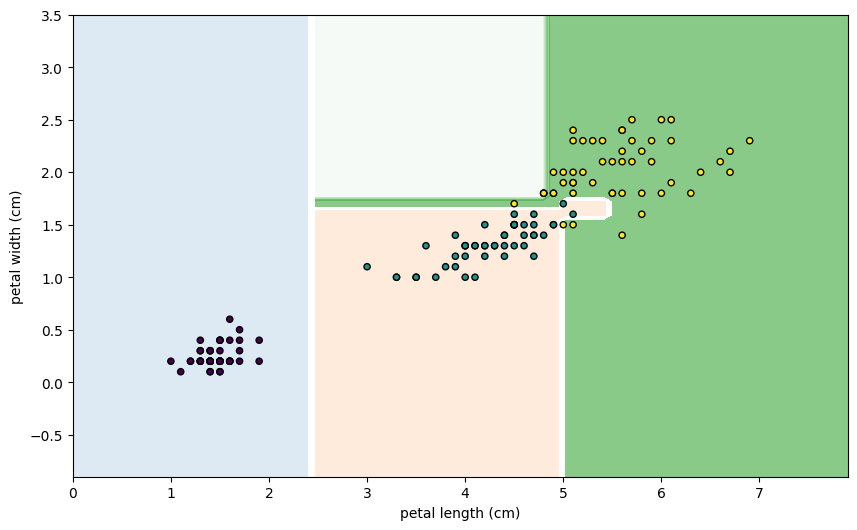

In [43]:
from sklearn.inspection import DecisionBoundaryDisplay

# entraînement du modèle sur les 2 dernières features de X
X_2d = X[:, 2:4]
clf = DecisionTreeClassifier(random_state =42).fit(X_2d , y)
_, ax = plt.subplots (1, 1, figsize =(10, 6))

# afficher la frontière de décision 
DecisionBoundaryDisplay.from_estimator(clf, X_2d, ax=ax,
                 xlabel= iris.feature_names [2], 
                 ylabel=iris.feature_names [3], alpha =0.6)
plt.scatter(X_2d[:, 0], X_2d[:, 1], c=y, edgecolor='k', s=20)
plt.show()

## Decision trees and overfitting

## Combining decision trees 